# **Ghori Zeel Jivrajbhai**

# **202201287**

**link of the colab file :** https://colab.research.google.com/drive/1TkaDVvfi7U3JZ1Xly6Dzb-Kkw8fGgU4c?usp=sharing

**link of the dataset :** https://drive.google.com/file/d/1pQd9ThykU53G1On8JVVGLRQatnUOwF90/view?usp=sharing


# **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Step 2: Load Data and Initial Analysis**

In [2]:
#mount the gdrive
from google.colab import drive
drive.mount("/content/gdrive")

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Exploratory_Data_Analysis/Dataset/mental_health_dataset.csv')

Mounted at /content/gdrive


In [3]:
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
data.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
# Identify numerical and categorical columns
numeric_cols_names = data.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:")
print(numeric_cols_names)

# Get names of categorical columns
categorical_cols_names = data.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols_names)

Numeric Columns:
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

Categorical Columns:
['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [7]:
data.shape

(140700, 20)

In [8]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [9]:
# Check for missing values
# Give the count of Null values for each column i.e., variables
data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


# **Step 3: Imputing missing values**

In [10]:
# Impute numerical columns with the mean and categorical columns with the mode
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
data[numeric_cols_names] = numeric_imputer.fit_transform(data[numeric_cols_names])
data[categorical_cols_names] = categorical_imputer.fit_transform(data[categorical_cols_names])

# Verify that missing values have been imputed
print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


# **Step 4: Data Visualization and Outlier Detection**

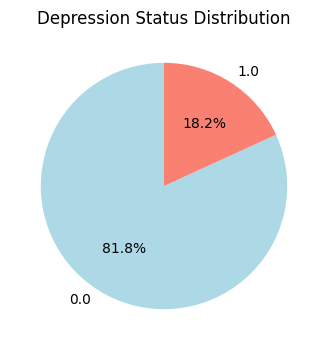

In [11]:
# Visualize target variable distribution if available, e.g., 'Depression'
if 'Depression' in data.columns:
    plt.figure(figsize=(6, 4))
    data['Depression'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
    plt.title("Depression Status Distribution")
    plt.ylabel('')
    plt.show()

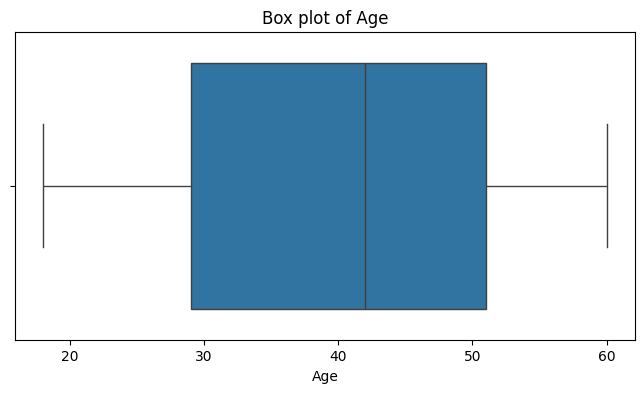

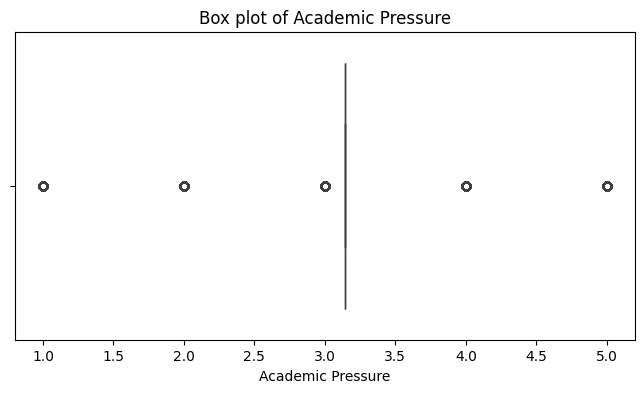

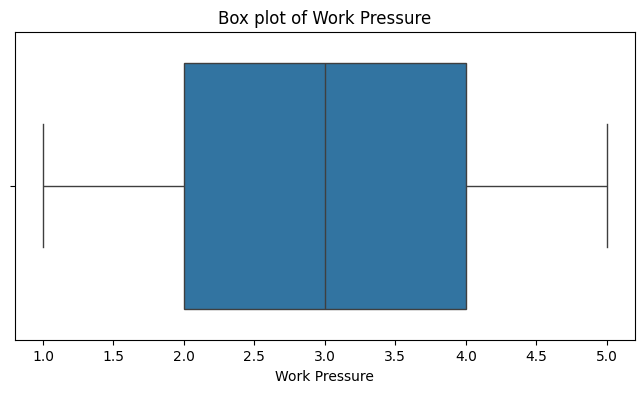

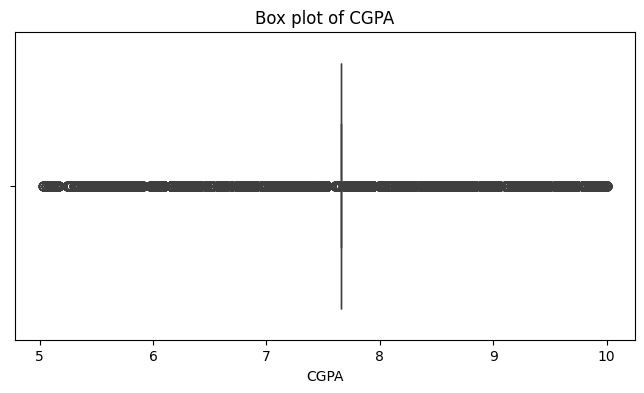

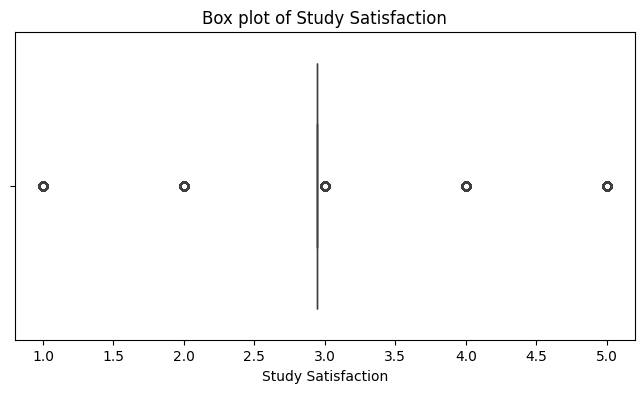

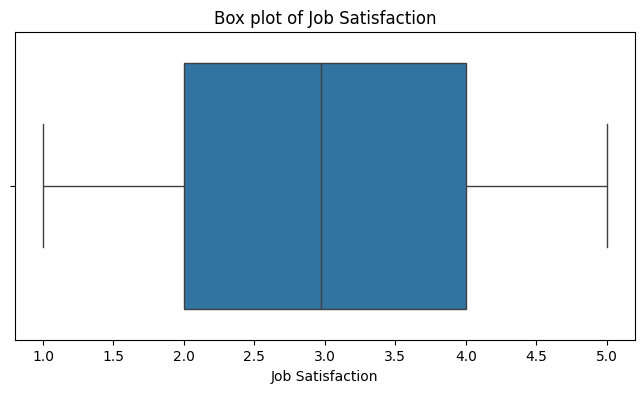

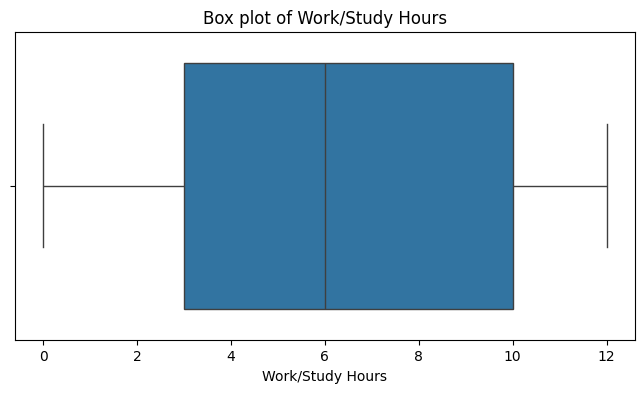

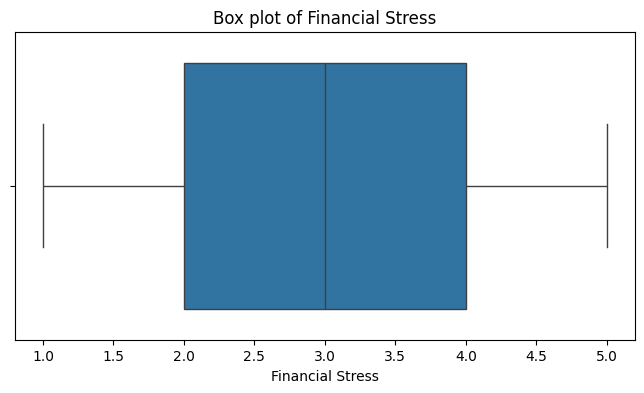

In [12]:
# Box plot for numerical features to detect outliers
numerical_cols = [col for col in numeric_cols_names if col not in ['Depression','id']]  # Replace with actual target column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [13]:
print("Original DataFrame shape: ", data.shape[0],"x", data.shape[1])
print(data)
# Remove outliers using IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
print("\nCleaned DataFrame without outliers:b ", data.shape[0],"x", data.shape[1])
print(data)

Original DataFrame shape:  140700 x 20
              id      Name  Gender   Age           City  \
0            0.0  Aaradhya  Female  49.0       Ludhiana   
1            1.0     Vivan    Male  26.0       Varanasi   
2            2.0    Yuvraj    Male  33.0  Visakhapatnam   
3            3.0    Yuvraj    Male  22.0         Mumbai   
4            4.0      Rhea  Female  30.0         Kanpur   
...          ...       ...     ...   ...            ...   
140695  140695.0     Vidya  Female  18.0      Ahmedabad   
140696  140696.0      Lata  Female  41.0      Hyderabad   
140697  140697.0   Aanchal  Female  24.0        Kolkata   
140698  140698.0    Prachi  Female  49.0       Srinagar   
140699  140699.0       Sai    Male  27.0          Patna   

       Working Professional or Student         Profession  Academic Pressure  \
0                 Working Professional               Chef           3.142273   
1                 Working Professional            Teacher           3.142273   
2           

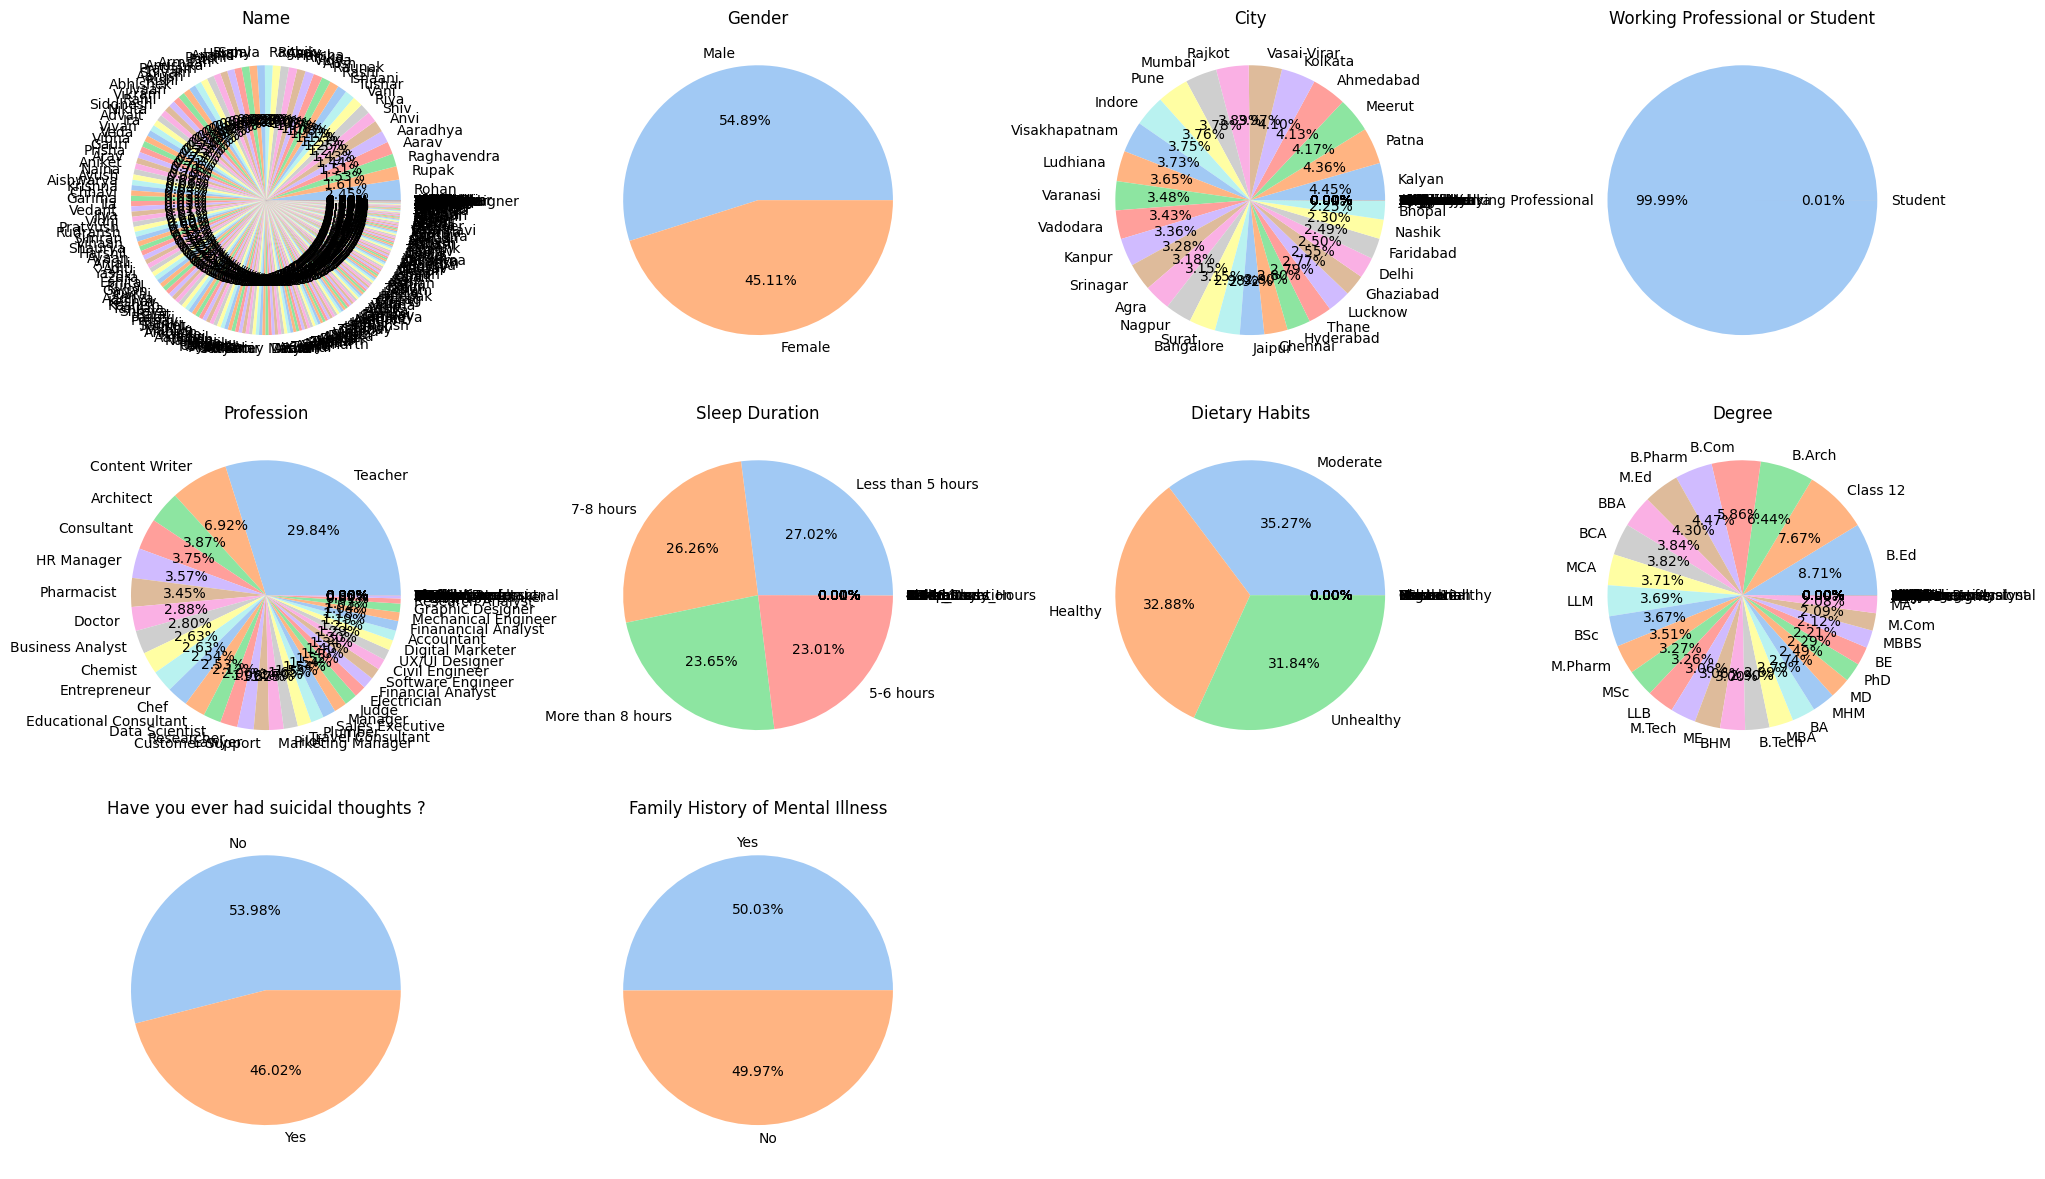

In [14]:
# Calculate the number of rows and columns needed for subplots
num_cats = len(categorical_cols_names)
cols = 4  # Number of columns per row
rows = (num_cats // cols) + (num_cats % cols > 0)  # Calculate required rows

# Create subplots with a dynamic grid size
fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 4))

# Flatten the axes array for easier indexing if more than one row
ax = ax.flatten() if rows > 1 else ax

# Plot pie charts for each categorical column
for axid, col in enumerate(categorical_cols_names):
    col_dist = data[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind='pie', colors=piec_colors, autopct='%1.2f%%', ax=ax[axid], ylabel='')
    ax[axid].set_title(col)

# Hide any unused subplots
for i in range(len(categorical_cols_names), len(ax)):
    ax[i].axis('off')

plt.tight_layout()
plt.show()


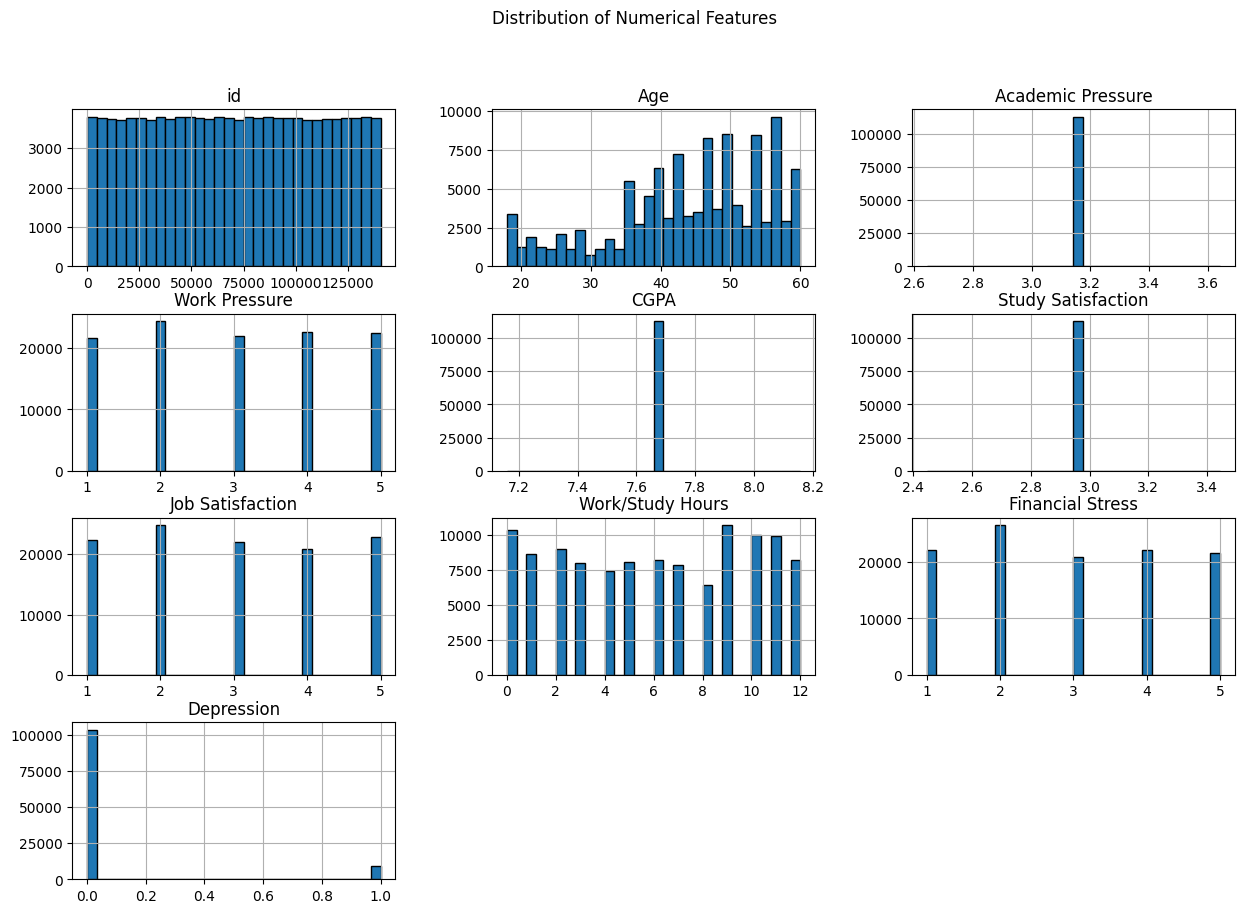

In [15]:
# Distribution of numerical features
data[numeric_cols_names].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

<Figure size 1200x800 with 0 Axes>

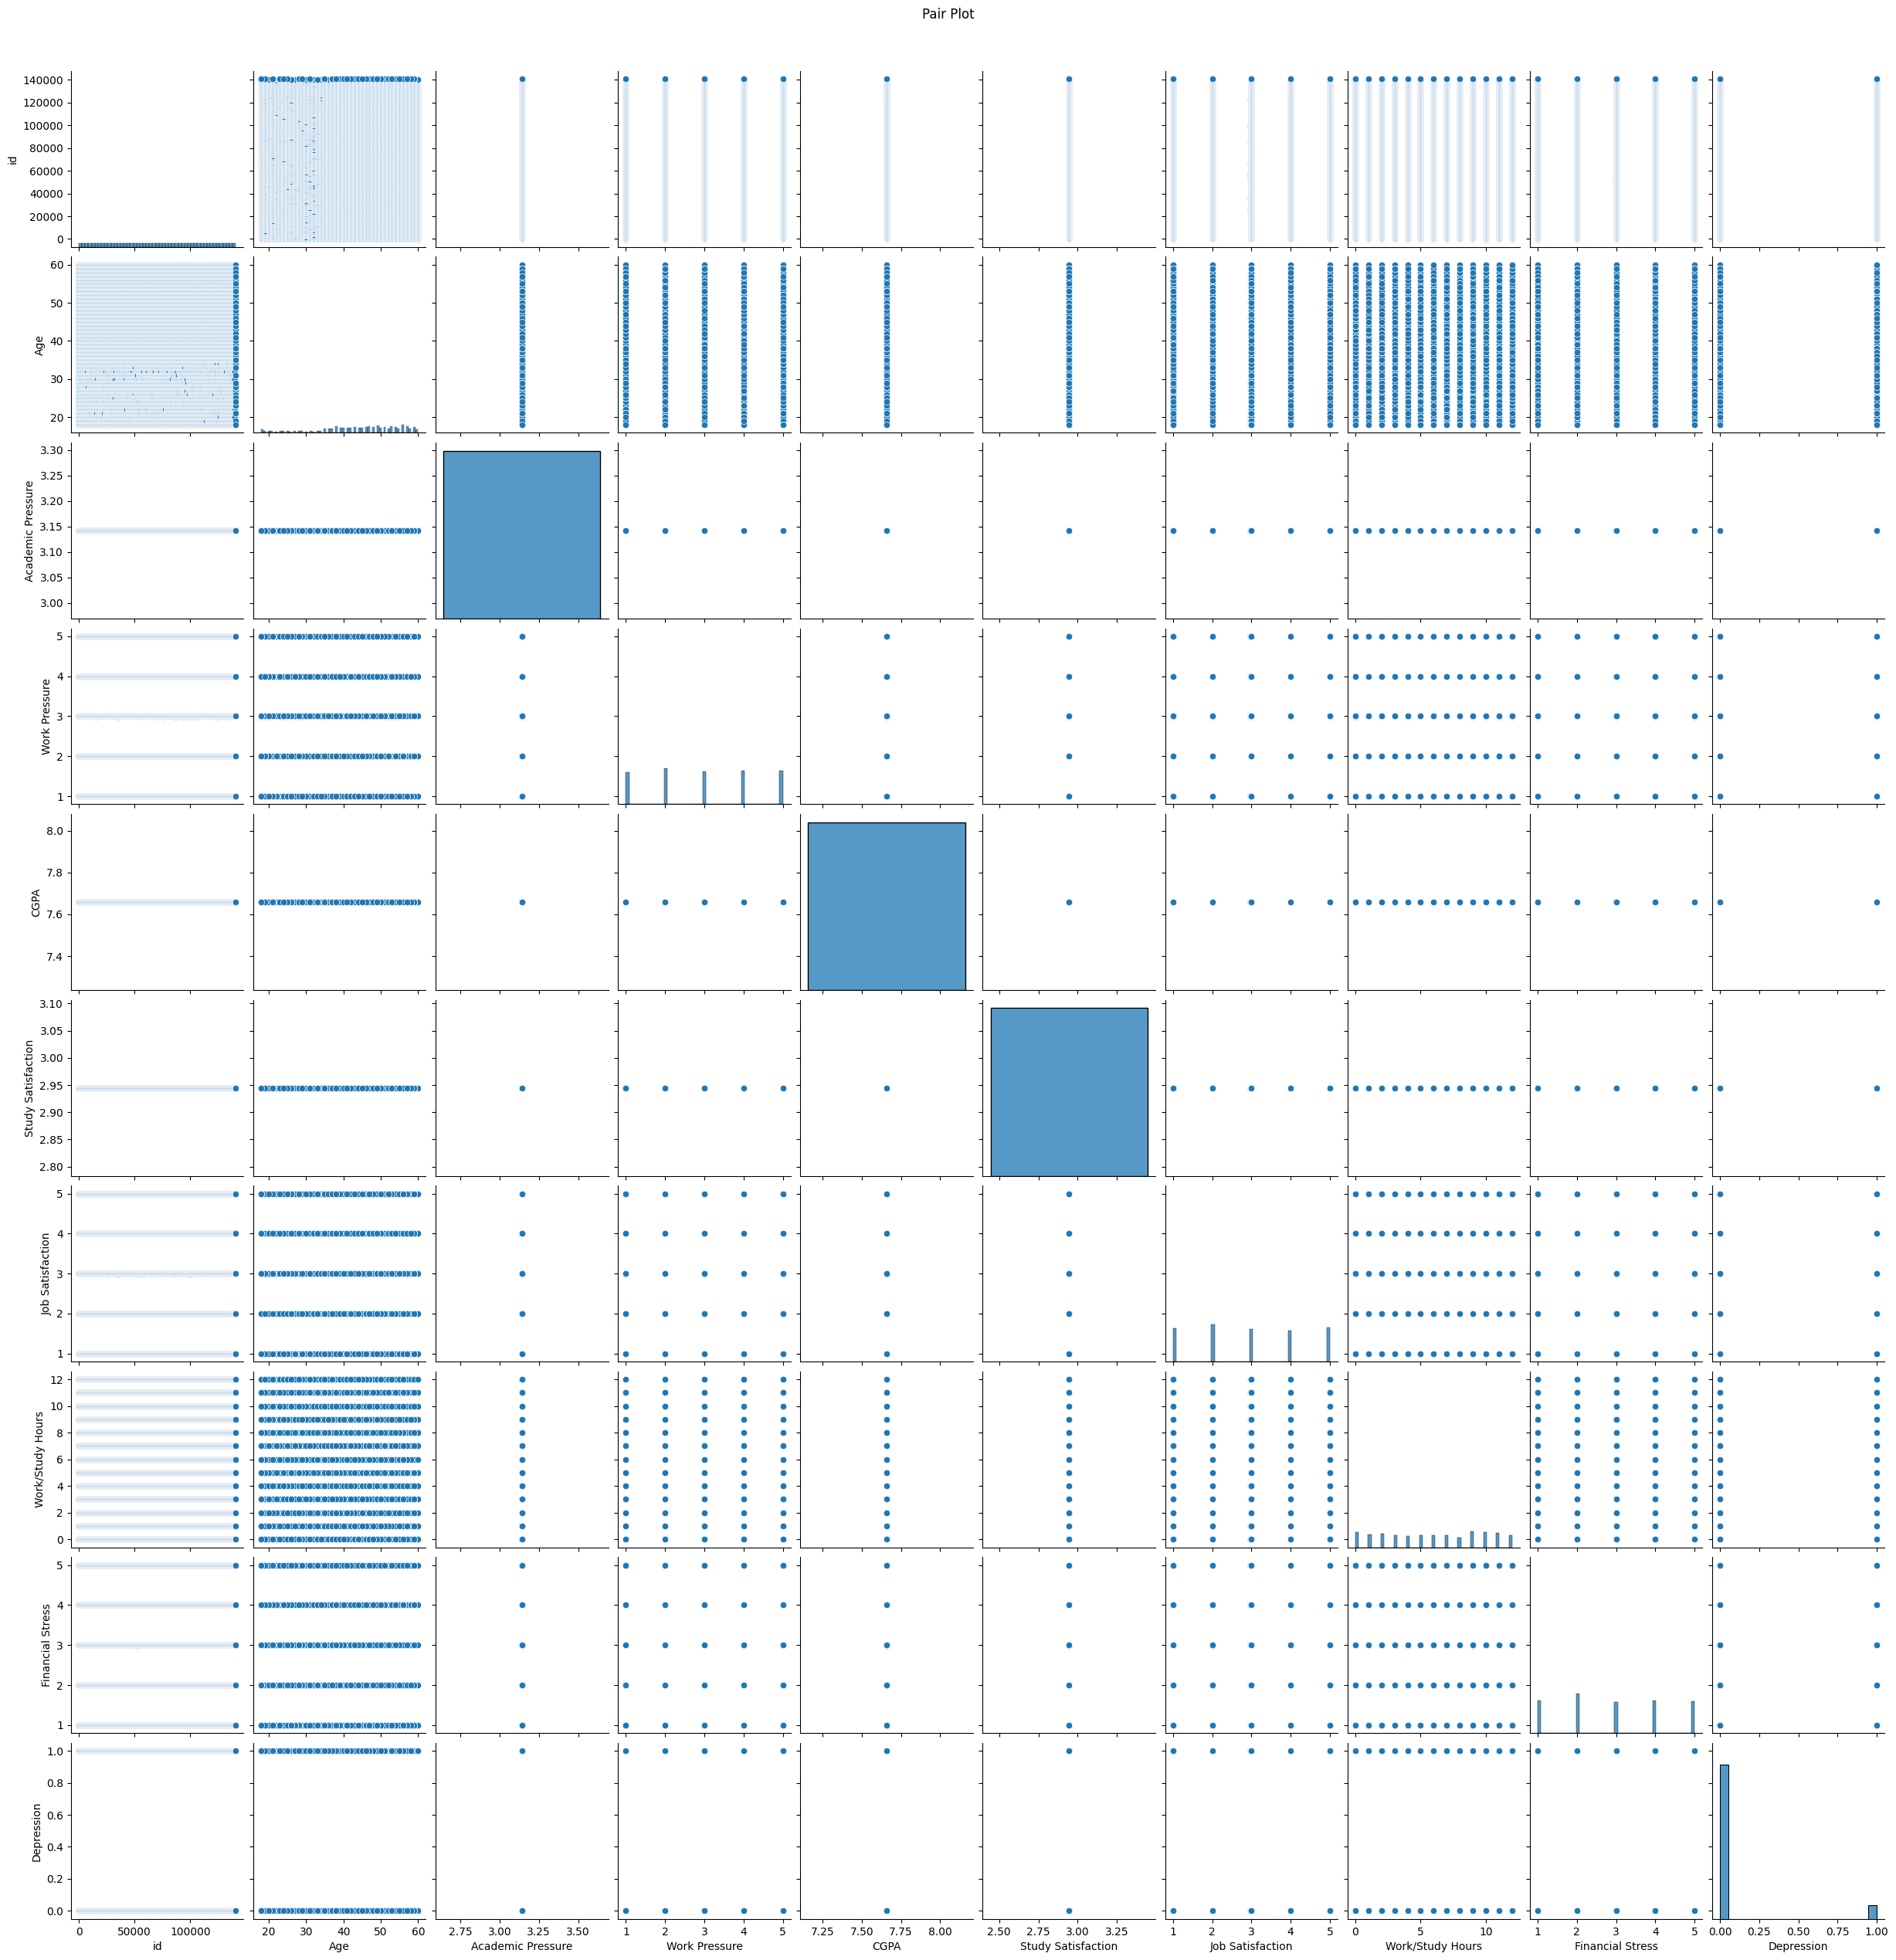

In [16]:
# Pair plots
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

# **Step 5: Encoding Categorical Variables**

In [17]:

# Identify columns for Label Encoding and One-Hot Encoding
label_encode_cols = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
one_hot_encode_cols = ['City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in label_encode_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), one_hot_encode_cols)],
    remainder='passthrough'
)

# Apply One-Hot Encoding
# data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)

# Display the first few rows to check the transformation
print("Data shape after encoding:", data.shape)
data.head()


Data shape after encoding: (112799, 20)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.0,Aaradhya,0,49.0,Ludhiana,Working Professional,Chef,3.142273,5.0,7.658636,2.94494,2.0,More than 8 hours,Healthy,BHM,0,1.0,2.0,0,0.0
1,1.0,Vivan,1,26.0,Varanasi,Working Professional,Teacher,3.142273,4.0,7.658636,2.94494,3.0,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,0,1.0
3,3.0,Yuvraj,1,22.0,Mumbai,Working Professional,Teacher,3.142273,5.0,7.658636,2.94494,1.0,Less than 5 hours,Moderate,BBA,1,10.0,1.0,1,1.0
4,4.0,Rhea,0,30.0,Kanpur,Working Professional,Business Analyst,3.142273,1.0,7.658636,2.94494,1.0,5-6 hours,Unhealthy,BBA,1,9.0,4.0,1,0.0
5,5.0,Vani,0,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.142273,2.0,7.658636,2.94494,5.0,5-6 hours,Healthy,MCA,0,7.0,5.0,0,0.0


# **Step 6: Feature Selection (Correlation Matrix & RFE)**

Depression            1.000000
Age                   0.470907
Work Pressure         0.216547
Financial Stress      0.187009
Job Satisfaction      0.168497
Work/Study Hours      0.140701
id                    0.005591
Academic Pressure          NaN
CGPA                       NaN
Study Satisfaction         NaN
Name: Depression, dtype: float64


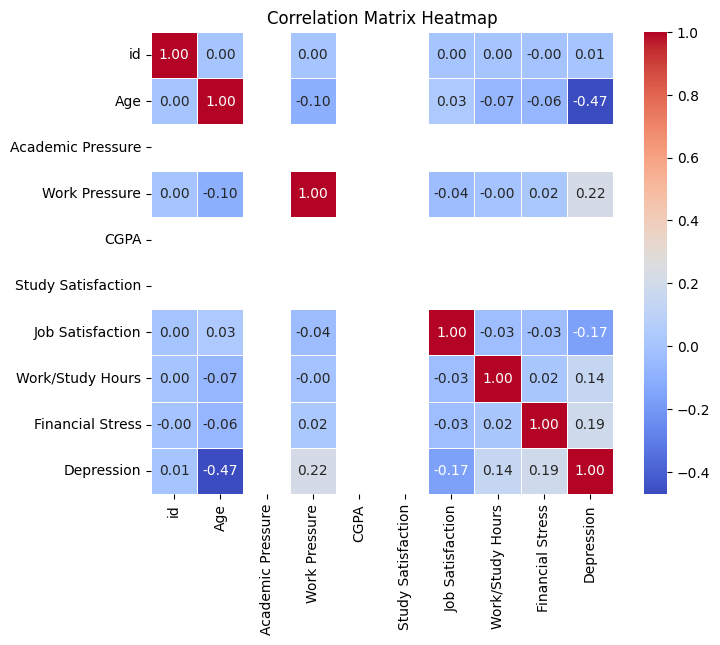

In [18]:
target = 'Depression'
# Calculate the correlation matrix
correlation_matrix = data[numeric_cols_names].corr()

correlation_with_target = correlation_matrix[target].abs().sort_values(ascending=False)

# Display features with correlation with the target
print(correlation_with_target)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

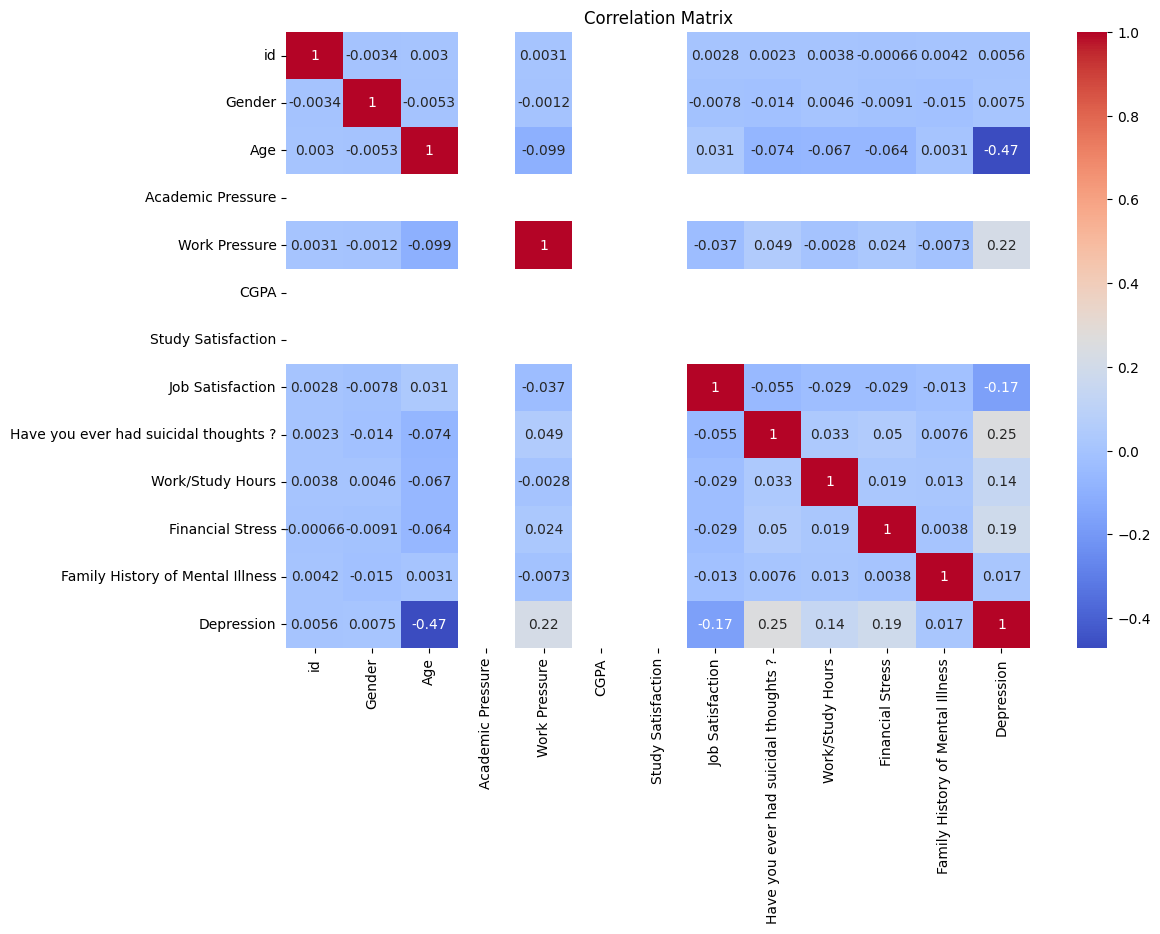

Gender                                     int64
Age                                      float64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
dtype: object
Selected features: Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')
   Gender   Age  Academic Pressure  Work Pressure      CGPA  \
0       0  49.0           3.142273            5.0  7.658636   
1       1  26.0           3.1

In [19]:
# Correlation matrix with numeric columns only
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Drop 'id' and 'Name' columns from X as they are identifiers and not features for modeling
X = data.drop(columns=['id', 'Name', 'Depression'])
y = data['Depression']

# Ensure all columns in X are numeric; remove any remaining non-numeric columns
X = X.select_dtypes(include=['float64', 'int64'])

# Check data types to confirm all columns in X are numeric
print(X.dtypes)

# Apply RFE for feature selection
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=15, step=1)
rfe_selector.fit(X, y)

# Retrieve selected features
selected_features = X.columns[rfe_selector.support_]
print("Selected features:", selected_features)

# Filter X to include only selected features
X = X[selected_features]

# Display final X
print(X.head())

# **Step 7: Splitting the Data and Scaling**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Step 8: Define and Evaluate Models (LightGBM and XGBoost)**

In [21]:
def evaluate_model(model, params):
    pipeline = Pipeline(steps=[('classifier', model)])
    grid_search = GridSearchCV(pipeline, params, scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_score_

# LightGBM model and hyperparameters
lgbm_model = LGBMClassifier()
lgbm_params = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [-1, 3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}
best_lgbm, lgbm_best_score = evaluate_model(lgbm_model, lgbm_params)
print(f"LightGBM - Best ROC-AUC: {lgbm_best_score:.4f}")

# XGBoost model and hyperparameters
xgb_model = XGBClassifier()
xgb_params = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}
best_xgb, xgb_best_score = evaluate_model(xgb_model, xgb_params)
print(f"XGBoost - Best ROC-AUC: {xgb_best_score:.4f}")


[LightGBM] [Info] Number of positive: 7839, number of negative: 88040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 95879, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081759 -> initscore=-2.418680
[LightGBM] [Info] Start training from score -2.418680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

# **Step 9: Final Model Evaluation on Test Set**

In [22]:
# Evaluate LightGBM on test set
y_pred_lgbm = best_lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Test Accuracy: {lgbm_accuracy:.4f}")
print(classification_report(y_test, y_pred_lgbm))

# Evaluate XGBoost on test set
y_pred_xgb = best_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(classification_report(y_test, y_pred_xgb))

LightGBM Test Accuracy: 0.9579
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     15529
         1.0       0.79      0.66      0.72      1391

    accuracy                           0.96     16920
   macro avg       0.88      0.82      0.85     16920
weighted avg       0.96      0.96      0.96     16920

XGBoost Test Accuracy: 0.9582
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     15529
         1.0       0.80      0.66      0.72      1391

    accuracy                           0.96     16920
   macro avg       0.88      0.82      0.85     16920
weighted avg       0.96      0.96      0.96     16920



In [23]:
# Load the test data
test_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Exploratory_Data_Analysis/Dataset/mental_health_dataset.csv')

# Drop the 'id' and 'Name' columns to get features for prediction
X_test = test_data.drop(columns=['id', 'Name'])

# Apply Label Encoding to binary categorical variables
binary_columns = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']  # Update binary columns as per your dataset
for col in binary_columns:
    label_encoder = LabelEncoder()
    X_test[col] = label_encoder.fit_transform(X_test[col])

# Apply One-Hot Encoding to other multi-class categorical variables
multi_class_columns = [
    'City', 'Working Professional or Student', 'Profession',
    'Sleep Duration', 'Dietary Habits', 'Degree'
]  # Update these based on your dataset
X_test = pd.get_dummies(X_test, columns=multi_class_columns, drop_first=True)

# Ensure test data has the same columns as the training set (selected features)
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns with 0 values

# Filter X_test to include only selected features
X_test = X_test[selected_features]

# Scale the test data using the same scaler as training
X_test = scaler.transform(X_test)

# Generate predictions (e.g., for 'Depression' or other target variable)
predictions = best_xgb.predict_proba(X_test)[:, 1]  # Probability of the positive class (adjusted as needed)

# Create the submission DataFrame with boolean column for predicted class
submission = pd.DataFrame({
    'id': test_data['id'],                          # Test set IDs
    'name': test_data['Name'],                      # Test set names
    'depression_probability': predictions,          # Probability of positive class
    'depression_prediction': predictions > 0.5      # Boolean column based on threshold 0.5
})

# Save submission file to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
